## 실습 개요

퍼셉트론은 인공 신경망의 기본 단위로, 단순한 선형 이진 분류 모델입니다. 퍼셉트론의 구조와 학습 원리를 이해하는 것은 딥러닝의 기초를 다지는 데 중요합니다. 이번 실습에서는 퍼셉트론의 구조를 설명하고, 구글 코랩에서 이를 구현하여 XOR 문제를 해결하는 코드를 작성합니다.

---

### 퍼셉트론 구조와 원리

퍼셉트론은 입력값과 가중치의 선형 조합에 활성화 함수를 적용하여 출력을 생성하는 간단한 모델입니다. 퍼셉트론은 다음과 같은 수학적 표현을 가집니다:

$$
y = \phi(\sum_{i=1}^n w_i x_i + b)
$$

여기서 $y$는 출력값, $\phi$는 활성화 함수, $w_i$는 가중치, $x_i$는 입력값, $b$는 바이어스입니다.

## 단층 퍼셉트론 : XOR 문제 해결 불가

In [2]:
## 1. 라이브러리 불러오기
import numpy as np

## 2. 활성화 함수 정의
def step_function(x):
    return np.where(x >= 0, 1, 0)

## 3. 퍼셉트론 클래스 정의
class Perceptron:
    def __init__(self, input_size, lr=0.1):
        self.weights = np.zeros(input_size + 1)  # 입력 크기 + 1 만큼의 가중치를 0으로 초기화 (바이어스 포함)
        self.lr = lr  # 학습률(learning rate)을 설정

    def predict(self, x):
        x = np.insert(x, 0, 1)  # 입력 데이터 x의 첫 번째 위치에 1을 삽입하여 바이어스 항 추가
        weighted_sum = np.dot(x, self.weights)  # 입력 데이터와 가중치의 내적을 계산하여 가중 합 계산
        return step_function(weighted_sum)  # 가중 합을 계단 함수에 적용하여 예측 결과 반환

    def train(self, X, y, epochs=10):
        for _ in range(epochs):  # 지정된 에포크 수만큼 반복
            for i in range(len(X)):  # 각 데이터 포인트에 대해 반복
                prediction = self.predict(X[i])  # 현재 데이터 포인트에 대한 예측값 계산
                # 가중치 업데이트: 현재 데이터 포인트의 정답과 예측값의 차이에 학습률을 곱해 가중치 조정
                self.weights += self.lr * (y[i] - prediction) * np.insert(X[i], 0, 1)

### 1. AND 연산

In [24]:
## 데이터셋 준비
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])
y = np.array([0, 0, 0, 1])  # AND 문제 정답

## 퍼셉트론 초기화 및 학습
AND_perceptron = Perceptron(input_size=2)
AND_perceptron.train(X, y, epochs=100)

## 예측 결과 확인
for x in X:
    print(f"입력: {x}, 예측 출력: {AND_perceptron.predict(x)}")

입력: [0 0], 예측 출력: 0
입력: [0 1], 예측 출력: 0
입력: [1 0], 예측 출력: 0
입력: [1 1], 예측 출력: 1


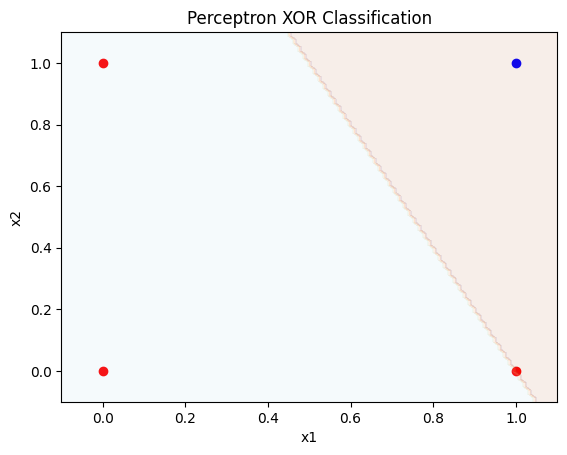

In [25]:
## 예측 결과 시각화
import matplotlib.pyplot as plt

# 학습 데이터와 예측 결과를 플롯에 그리기
def plot_prediction(perceptron, X):

    for x in X:
        plt.scatter(x[0], x[1], color='red' if perceptron.predict(x) == 0 else 'blue')

    # 결정 경계 시각화
    xx, yy = np.meshgrid(np.linspace(-0.1, 1.1, 100), np.linspace(-0.1, 1.1, 100))
    Z = np.array([perceptron.predict(np.array([xx_i, yy_i])) for xx_i, yy_i in zip(xx.ravel(), yy.ravel())])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.1, cmap=plt.cm.Paired)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title('Perceptron XOR Classification')
    plt.show()


plot_prediction(AND_perceptron, X)

### 2. OR 연산

In [26]:
## 데이터셋 준비
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])
y = np.array([0, 1, 1, 1])  # OR 문제 정답

## 퍼셉트론 초기화 및 학습
OR_perceptron = Perceptron(input_size=2)
OR_perceptron.train(X, y, epochs=100)

## 예측 결과 확인
for x in X:
    print(f"입력: {x}, 예측 출력: {OR_perceptron.predict(x)}")

입력: [0 0], 예측 출력: 0
입력: [0 1], 예측 출력: 1
입력: [1 0], 예측 출력: 1
입력: [1 1], 예측 출력: 1


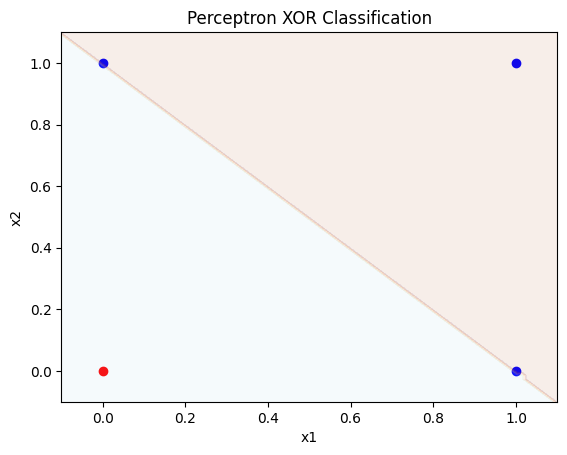

In [27]:
## 예측 결과 시각화
plot_prediction(OR_perceptron, X)

### 3. XOR 연산

In [28]:
## 데이터셋 준비
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])
y = np.array([0, 1, 1, 0])  # XOR 문제 정답

## 퍼셉트론 초기화 및 학습
XOR_perceptron = Perceptron(input_size=2)
XOR_perceptron.train(X, y, epochs=100)

## 예측 결과 확인
for x in X:
    print(f"입력: {x}, 예측 출력: {XOR_perceptron.predict(x)}")

입력: [0 0], 예측 출력: 1
입력: [0 1], 예측 출력: 1
입력: [1 0], 예측 출력: 0
입력: [1 1], 예측 출력: 0


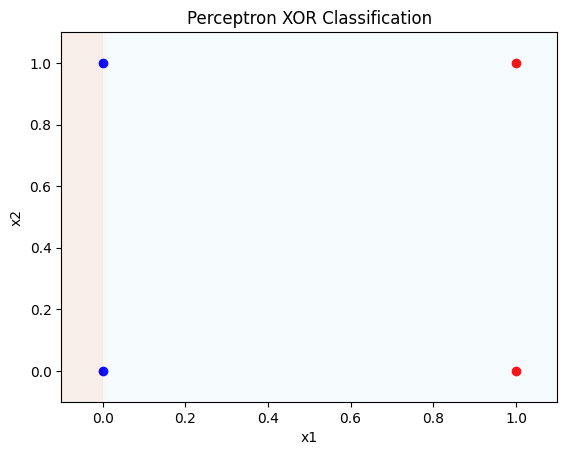

In [29]:
## 예측 결과 시각화
plot_prediction(XOR_perceptron, X)

## 다층 퍼셉트론(MLP): XOR 문제 해결

`(1) NAND + OR`

In [31]:
def XOR_network(x):
    # NAND
    h1 = 0 if AND_perceptron.predict(x) == 1 else 1

    # OR
    h2 = OR_perceptron.predict(x)

    return AND_perceptron.predict([h1, h2])

## 예측 결과 확인
for x in X:
    print(f"입력: {x}, 예측 출력: {XOR_network(x)}")

입력: [0 0], 예측 출력: 0
입력: [0 1], 예측 출력: 1
입력: [1 0], 예측 출력: 1
입력: [1 1], 예측 출력: 0


`(2) MLP`

In [32]:
## 활성화 함수 정의
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

## MLP 클래스 정의
class MLP:
    def __init__(self, input_size, hidden_size, output_size, lr=0.1):
        # 가중치 초기화
        self.weights_input_hidden = np.random.rand(input_size, hidden_size)  # 입력층에서 은닉층으로 가는 가중치를 무작위로 초기화
        self.weights_hidden_output = np.random.rand(hidden_size, output_size)  # 은닉층에서 출력층으로 가는 가중치를 무작위로 초기화
        self.lr = lr  # 학습률(learning rate)을 설정

    def predict(self, x):
        # 순방향 전파
        self.hidden_input = np.dot(x, self.weights_input_hidden)  # 입력 데이터와 입력층-은닉층 가중치의 내적 계산
        self.hidden_output = sigmoid(self.hidden_input)  # 은닉층 활성화 함수를 적용하여 은닉층 출력 계산
        self.final_input = np.dot(self.hidden_output, self.weights_hidden_output)  # 은닉층 출력과 은닉층-출력층 가중치의 내적 계산
        self.final_output = sigmoid(self.final_input)  # 출력층 활성화 함수를 적용하여 최종 출력 계산
        return self.final_output  # 최종 출력 반환

    def train(self, X, y, epochs=10000):
        for _ in range(epochs):  # 지정된 에포크 수만큼 반복
            for i in range(len(X)):  # 각 데이터 포인트에 대해 반복
                # 순방향 전파
                x = X[i].reshape(1, -1)  # 현재 데이터 포인트를 행 벡터로 변환
                target = y[i].reshape(1, -1)  # 현재 타깃 값을 행 벡터로 변환

                self.hidden_input = np.dot(x, self.weights_input_hidden)  # 입력 데이터와 입력층-은닉층 가중치의 내적 계산
                self.hidden_output = sigmoid(self.hidden_input)  # 은닉층 활성화 함수를 적용하여 은닉층 출력 계산
                self.final_input = np.dot(self.hidden_output, self.weights_hidden_output)  # 은닉층 출력과 은닉층-출력층 가중치의 내적 계산
                self.final_output = sigmoid(self.final_input)  # 출력층 활성화 함수를 적용하여 최종 출력 계산

                # 역방향 전파
                output_error = target - self.final_output  # 출력 오차 계산 (목표값 - 실제 출력값)
                output_delta = output_error * sigmoid_derivative(self.final_output)  # 출력 오차에 활성화 함수의 미분 값을 곱하여 출력층 델타 계산

                hidden_error = output_delta.dot(self.weights_hidden_output.T)  # 출력층 델타와 은닉층-출력층 가중치의 내적을 계산하여 은닉층 오차 계산
                hidden_delta = hidden_error * sigmoid_derivative(self.hidden_output)  # 은닉층 오차에 활성화 함수의 미분 값을 곱하여 은닉층 델타 계산

                # 가중치 업데이트
                self.weights_hidden_output += self.hidden_output.T.dot(output_delta) * self.lr  # 은닉층-출력층 가중치를 은닉층 출력과 출력층 델타의 내적에 학습률을 곱한 값으로 업데이트
                self.weights_input_hidden += x.T.dot(hidden_delta) * self.lr  # 입력층-은닉층 가중치를 입력 데이터와 은닉층 델타의 내적에 학습률을 곱한 값으로 업데이트


## 데이터셋 준비
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])
y = np.array([[0], [1], [1], [0]])  # XOR 문제 정답

## MLP 초기화 및 학습
mlp = MLP(input_size=2, hidden_size=2, output_size=1)
mlp.train(X, y, epochs=10000)

## 예측 결과 확인
for x in X:
    print(f"입력: {x}, 예측 출력: {mlp.predict(x)}")

입력: [0 0], 예측 출력: [0.2009832]
입력: [0 1], 예측 출력: [0.73792779]
입력: [1 0], 예측 출력: [0.73620976]
입력: [1 1], 예측 출력: [0.32986325]


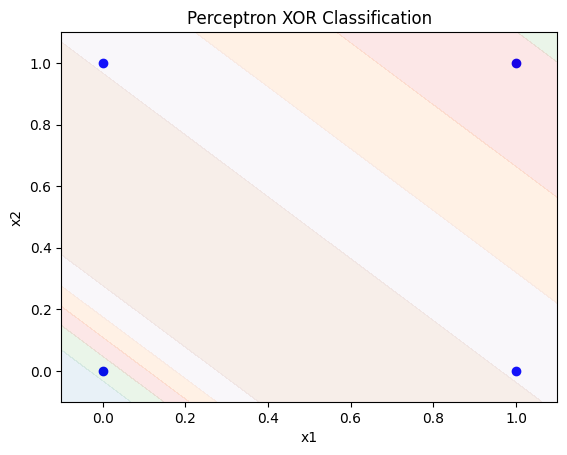

In [33]:
## 예측 결과 시각화
plot_prediction(mlp, X)